Notebook 03 — Visuals for Report
Purpose

This notebook focuses on creating clear, presentation-ready visualizations that highlight behavioral differences between casual riders and annual members.
These visuals will be used directly in the final report and portfolio case study.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 150

print("Imports loaded.")


Imports loaded.


In [2]:
data_path = Path("../data_cleaned/cyclistic_may2024_cleaned.csv")
df = pd.read_csv(data_path)

print("Loaded dataset shape:", df.shape)
df.head()


Loaded dataset shape: (609232, 18)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_minutes,day_of_week,hour,date,is_weekend
0,7D9F0CE9EC2A1297,classic_bike,2024-05-25 15:52:42,2024-05-25 16:11:50,Streeter Dr & Grand Ave,13022,Clark St & Elm St,TA1307000039,41.892278,-87.612043,41.902973,-87.631280,casual,19.133333,Saturday,15,2024-05-25,True
1,02EC47687411416F,classic_bike,2024-05-14 15:11:51,2024-05-14 15:22:00,Sheridan Rd & Greenleaf Ave,KA1504000159,Sheridan Rd & Loyola Ave,RP-009,42.010587,-87.662412,42.001044,-87.661198,casual,10.150000,Tuesday,15,2024-05-14,False
2,101370FB2D3402BE,classic_bike,2024-05-30 17:46:04,2024-05-30 18:09:16,Streeter Dr & Grand Ave,13022,Wabash Ave & 9th St,TA1309000010,41.892278,-87.612043,41.870769,-87.625734,member,23.200000,Thursday,17,2024-05-30,False
3,E97E396331ED6913,electric_bike,2024-05-17 20:21:54,2024-05-17 20:40:32,Streeter Dr & Grand Ave,13022,Sheffield Ave & Wellington Ave,TA1307000052,41.892270,-87.611946,41.936253,-87.652662,member,18.633333,Friday,20,2024-05-17,False
4,674EDE311C543165,classic_bike,2024-05-22 18:52:20,2024-05-22 18:59:04,Larrabee St & Division St,KA1504000079,Clark St & Elm St,TA1307000039,41.903486,-87.643353,41.902973,-87.631280,casual,6.733333,Wednesday,18,2024-05-22,False


In [3]:
required_cols = [
    "member_casual",
    "ride_length_minutes",
    "day_of_week",
    "hour",
    "rideable_type"
]

missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

df[required_cols].head()


,member_casual,ride_length_minutes,day_of_week,hour,rideable_type
0,casual,19.133333,Saturday,15,classic_bike
1,casual,10.150000,Tuesday,15,classic_bike
2,member,23.200000,Thursday,17,classic_bike
3,member,18.633333,Friday,20,electric_bike
4,casual,6.733333,Wednesday,18,classic_bike


In [4]:
visuals_dir = Path("../visuals")
visuals_dir.mkdir(exist_ok=True)

print("Visuals directory ready.")


Visuals directory ready.


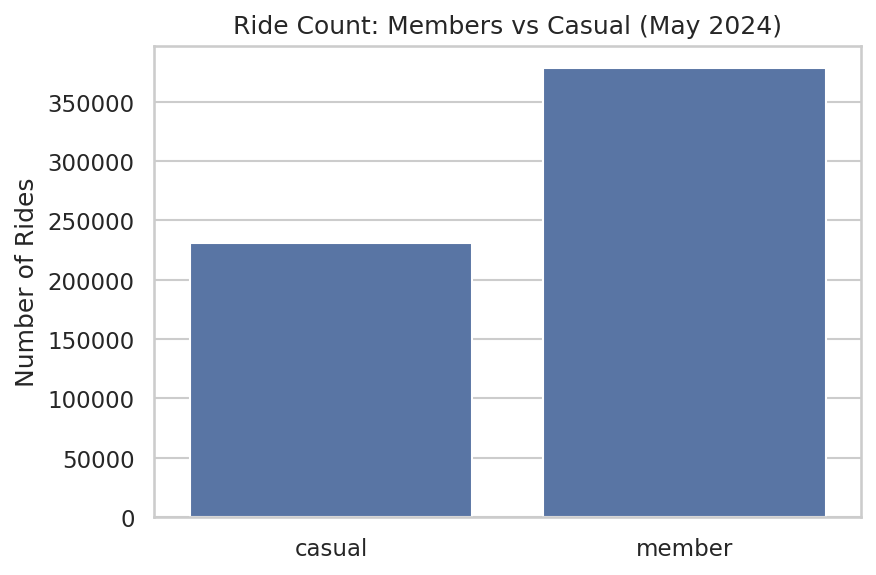

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="member_casual")
plt.title("Ride Count: Members vs Casual (May 2024)")
plt.xlabel("")
plt.ylabel("Number of Rides")

out_file = visuals_dir / "01_ride_count_members_vs_casual.png"
plt.tight_layout()
plt.savefig(out_file)
plt.show()


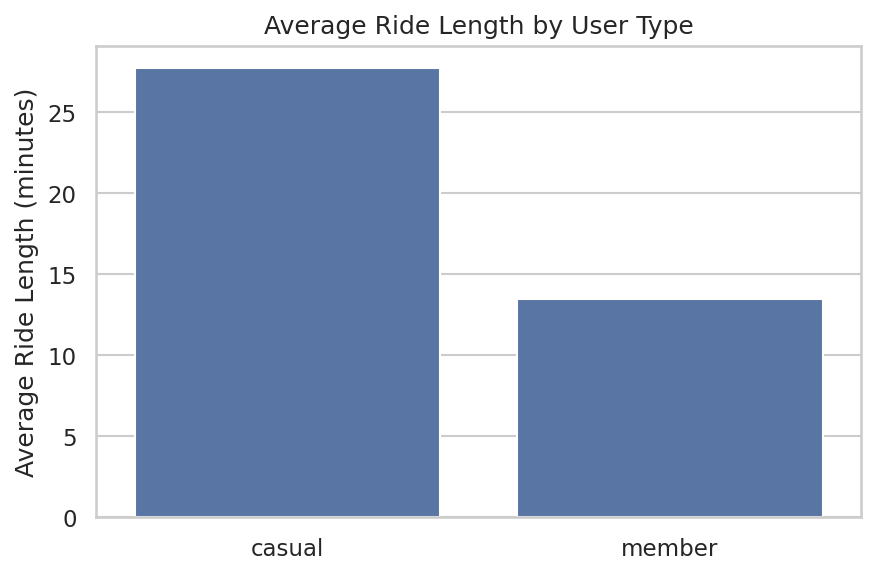

,member_casual,ride_length_minutes
0,casual,27.748668
1,member,13.494063


In [6]:
avg_ride_length = (
    df.groupby("member_casual")["ride_length_minutes"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(data=avg_ride_length, x="member_casual", y="ride_length_minutes")
plt.title("Average Ride Length by User Type")
plt.xlabel("")
plt.ylabel("Average Ride Length (minutes)")

out_file = visuals_dir / "02_avg_ride_length_by_user_type.png"
plt.tight_layout()
plt.savefig(out_file)
plt.show()

avg_ride_length


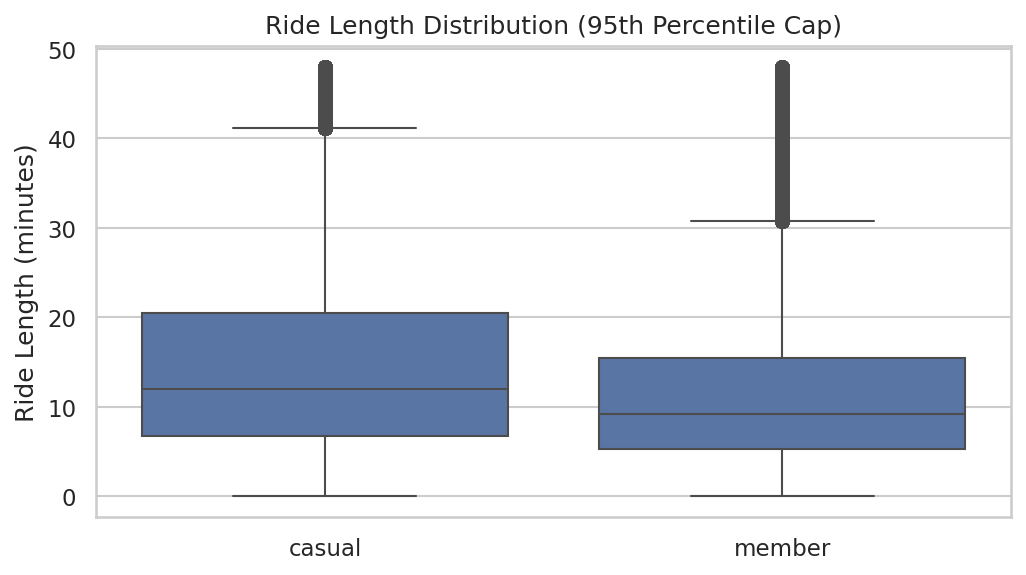

In [7]:
cap = df["ride_length_minutes"].quantile(0.95)
df_capped = df[df["ride_length_minutes"] <= cap]

plt.figure(figsize=(7,4))
sns.boxplot(data=df_capped, x="member_casual", y="ride_length_minutes")
plt.title("Ride Length Distribution (95th Percentile Cap)")
plt.xlabel("")
plt.ylabel("Ride Length (minutes)")

out_file = visuals_dir / "03_ride_length_distribution_boxplot.png"
plt.tight_layout()
plt.savefig(out_file)
plt.show()


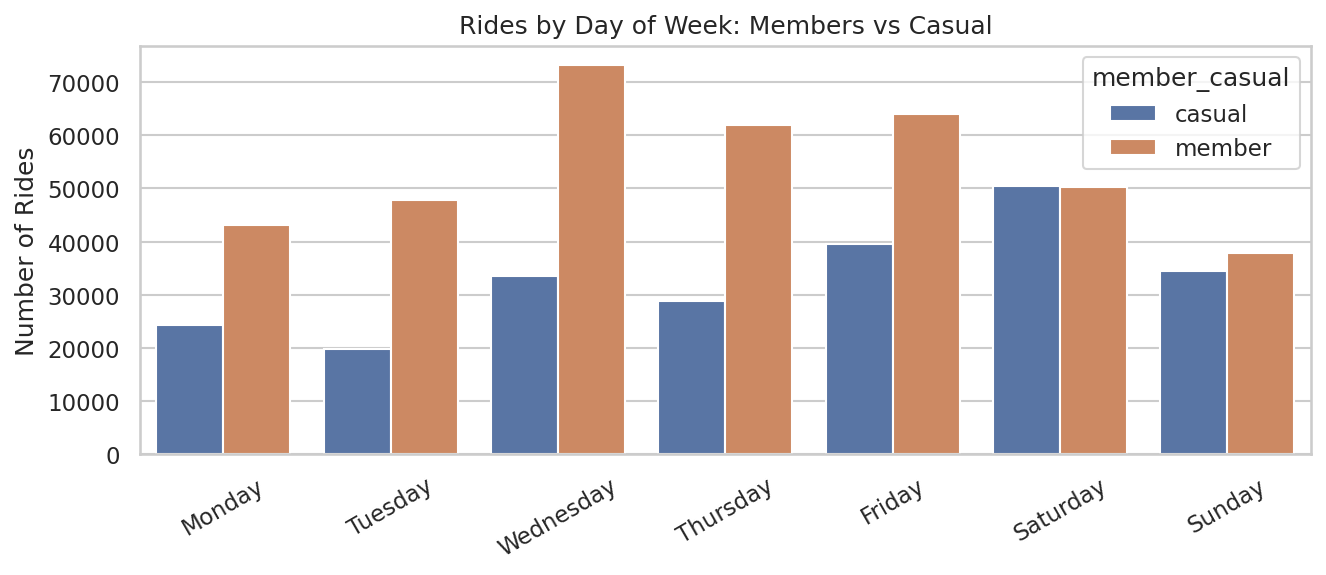

In [8]:
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

rides_by_day = (
    df.groupby(["day_of_week","member_casual"])
      .size()
      .reset_index(name="ride_count")
)

plt.figure(figsize=(9,4))
sns.barplot(
    data=rides_by_day,
    x="day_of_week",
    y="ride_count",
    hue="member_casual",
    order=day_order
)

plt.title("Rides by Day of Week: Members vs Casual")
plt.xlabel("")
plt.ylabel("Number of Rides")
plt.xticks(rotation=30)

out_file = visuals_dir / "04_rides_by_day_of_week.png"
plt.tight_layout()
plt.savefig(out_file)
plt.show()


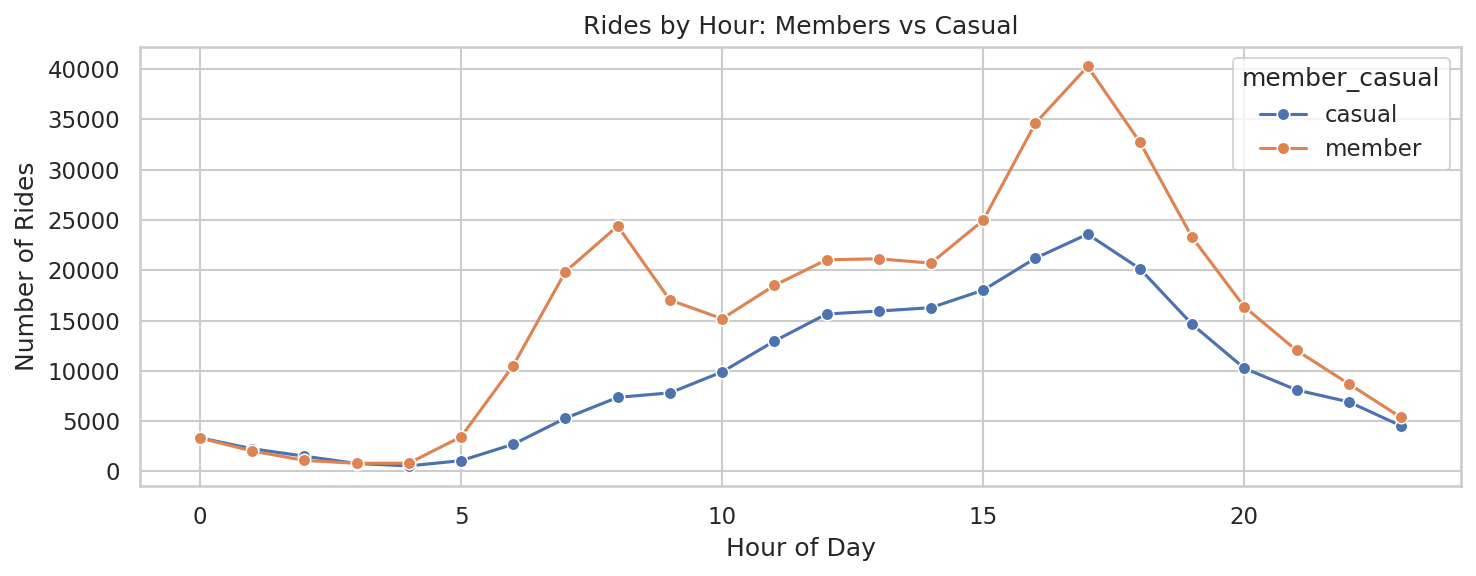

In [9]:
rides_by_hour = (
    df.groupby(["hour","member_casual"])
      .size()
      .reset_index(name="ride_count")
)

plt.figure(figsize=(10,4))
sns.lineplot(
    data=rides_by_hour,
    x="hour",
    y="ride_count",
    hue="member_casual",
    marker="o"
)

plt.title("Rides by Hour: Members vs Casual")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")

out_file = visuals_dir / "05_rides_by_hour.png"
plt.tight_layout()
plt.savefig(out_file)
plt.show()


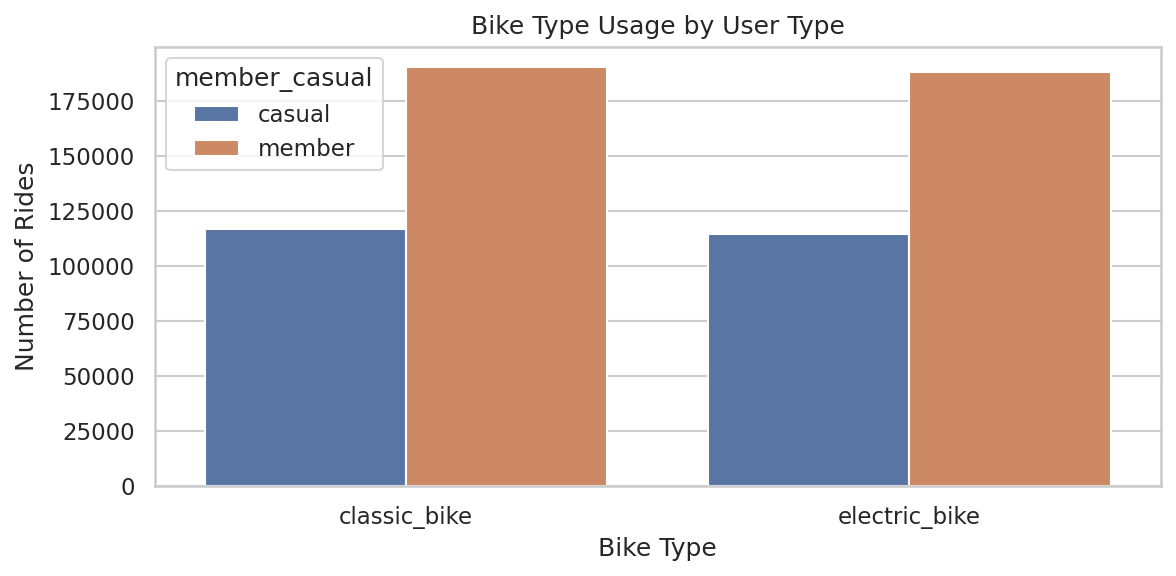

In [10]:
bike_usage = (
    df.groupby(["rideable_type","member_casual"])
      .size()
      .reset_index(name="ride_count")
)

plt.figure(figsize=(8,4))
sns.barplot(
    data=bike_usage,
    x="rideable_type",
    y="ride_count",
    hue="member_casual"
)

plt.title("Bike Type Usage by User Type")
plt.xlabel("Bike Type")
plt.ylabel("Number of Rides")

out_file = visuals_dir / "06_bike_type_usage.png"
plt.tight_layout()
plt.savefig(out_file)
plt.show()


In [11]:
sorted([p.name for p in visuals_dir.glob("*.png")])


['01_ride_count_members_vs_casual.png',
 '02_avg_ride_length_by_user_type.png',
 '03_ride_length_distribution_boxplot.png',
 '04_rides_by_day_of_week.png',
 '05_rides_by_hour.png',
 '06_bike_type_usage.png']